# Week5 : Tree Based Methods

### Objectives
This homework sheet will help reviewing the basic concepts associated with tree-based methods and provide a basic introduction to the ML workflow using real-world datasets. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

The following website has access to the relevant datasets from the recommended textbook: https://book.huihoo.com/introduction-to-statistical-learning/data.html

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| 1     | 3      |
| 2     | 3     |
| 3a     | 2     |
| 3b     | 2     |
| 3c     | 5     |

# Questions

Conceptual


Q1. Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1$, $R_2$, ... , the cutpoints $t_1$ , $t_2$, ..., and so forth. Please insert your sketch below.


**Please note: You can use Microsoft word / any editor or draw the image by hand, you can upload the image / screenshot  to colab file using insert image option in text cell**


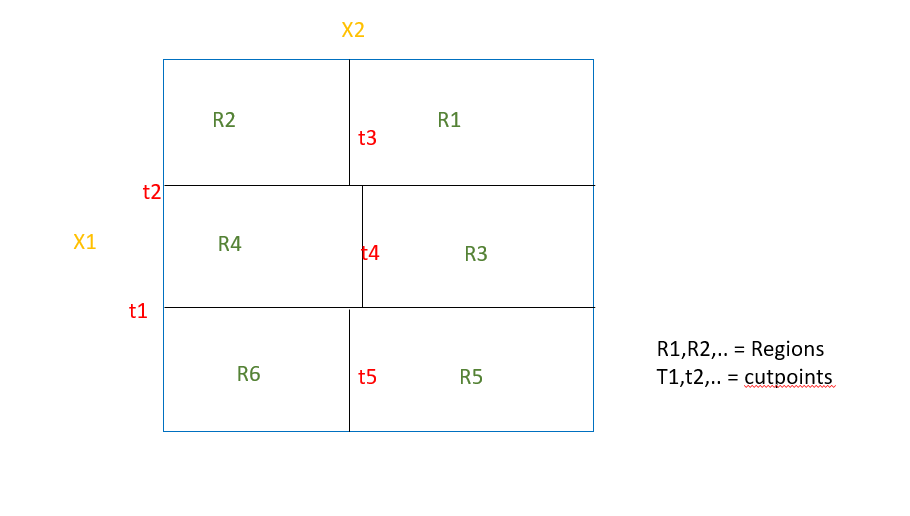

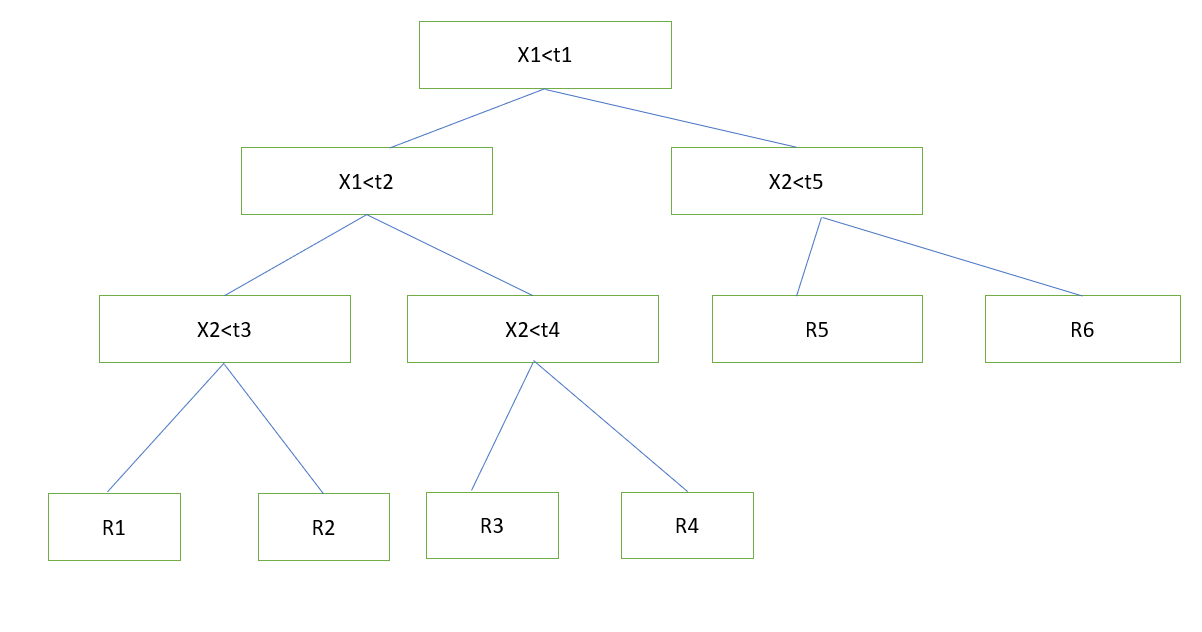

Q2. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(Class is Red|X)$:

$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, and $0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach , the second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

ANSWER:

According to voting method Red is selected as the final classification because it appears more number of times i.e 6 times out of the 10 predictions compared to Green 4 times.

Alternatively the average probability for Red is calculated as

(0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.46 while the average probability for Green is found as 1 - 0.46 = 0.54.

Given the average probability for Green is marginally higher under this approach we classify X as Green.

# APPLIED

Q3. Apply boosting and random forest to a data set of your choice. Feel free to use any of the datasets from ISLR dataset link provided ( https://book.huihoo.com/introduction-to-statistical-learning/data.html ) to examine any of the questions that were discussed in any of the previous homeworks. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods (e.g. linear or logistic regression models)? Which of these approaches yields the best performance?

#### ANSWER



In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

####a) Read the dataset using function read_csv( ) from pandas library and preprocess the data if required ( check for any missing values etc )



In [ ]:
df=pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
hp=pd.DataFrame(df.horsepower.str.isdigit())
hp[hp['horsepower'] == False]

,horsepower
32,False
126,False
330,False
336,False
354,False


In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce').fillna(0).astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,103.153652,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,39.986602,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### b) Split the data into train data  and test data ( proportion of train and test data of your choice )

Reference :

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [ ]:
X = df.drop(['origin','name'],axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
std_scaler = StandardScaler()
scaled_X_train = std_scaler.fit_transform(X_train)
scaled_X_test = std_scaler.fit_transform(X_test)

####c) Train the data on the below models

i) Linear regression model
ii) Gradient boosting model
iii) Random forest model

check the train and test r2 score and mention your findings on which model performed better in terms of underfitting / overfitting etc

References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#gradient-boosting-regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

***i) Linear regression model***

In [ ]:
Linear_model = LinearRegression()
Linear_model.fit(scaled_X_train,y_train)

y_train_pred = Linear_model.predict(scaled_X_train)
r2_train_LM=r2_score(y_train, y_train_pred)
print('r2 on train:', r2_train_LM)

y_pred=Linear_model.predict(scaled_X_test)
r2_test_LM = r2_score(y_test, y_pred)
print('r2 on test:', r2_test_LM)

r2 on train: 1.0
r2 on test: 0.9992732323817897


***ii) Gradient boosting model***

In [ ]:
gb_model=GradientBoostingRegressor()
gb_model.fit(scaled_X_train,y_train)

ytrain_pred_gb = gb_model.predict(scaled_X_train)
r2_train_gb=r2_score(y_train, ytrain_pred_gb)
print('r2 on train:', r2_train_gb)

ytest_pred_gb = gb_model.predict(scaled_X_test)
r2_test_gb = r2_score(y_test, ytest_pred_gb)
print('r2 on test:', r2_test_gb)

r2 on train: 0.9999956380161575
r2 on test: 0.9989623144734946


***iii) Random forest model***

In [ ]:
rf_model=RandomForestRegressor()
rf_model.fit(scaled_X_train , y_train)

ytrain_pred_rf = rf_model.predict(scaled_X_train)
r2_train_rf=r2_score(y_train, ytrain_pred_rf)
print('r2 on train:', r2_train_rf)

ytest_pred_rf = rf_model.predict(scaled_X_test)
r2_test_rf = r2_score(y_test, ytest_pred_rf)
print('r2 on test:', r2_test_rf)

r2 on train: 0.9997930085066343
r2 on test: 0.9988721086200597


Among the models we evaluated Random Forest and Gradient Boosting demonstrated strong performance on the test dataset.

In contrast to the above statement the Linear Regression model exhibited indications of overfitting despite achieving a high R2 score on the test data.